In [1]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import dotenv_values
import sqlite3
import sqlite_utils
import time
import statistics


In [20]:
def is_forward(x, y , side) :
    a = -1
    b = 16000 - a* 0

    y_diag = a * x+b

    if side == 100: #blue side
        if y > y_diag :
            return True
        else :
            return False
    if side == 200 : #Red side, on inverse alors
        if y > y_diag :
            return False
        else :
            return True

In [2]:
mid_kr_puuid = "yke-_ZuAP9wM6s3tpe-FnVWLlnwI4qLuLRzz933HfpI_jzKcDa1YwXbWGpFC7WJek_rv4x_kXk2Y-A"

In [3]:
conn = sqlite3.connect('koren_soloq_db.db')
cursor = conn.cursor()
match_end_data = cursor.execute('''SELECT metadata, info FROM MATCH_DATA''').fetchall()
match_timeline_data = cursor.execute('''SELECT metadata, timelineinfo FROM MATCH_DATA''').fetchall()

conn.close()

In [4]:
#Filter only mid role games
list_match_end_data_whereMid = []
mid_matchs = []
for idx_match, match in enumerate(match_end_data) :
    match_info = json.loads(match[1])
    for idx, participant in enumerate(match_info['participants']):
        if (participant['puuid'] == mid_kr_puuid) and (participant['teamPosition'] == "MIDDLE"):
            list_match_end_data_whereMid.append(match)
            mid_matchs.append(idx_match)

list_match_timeline_data_whereMid = [match_timeline_data[i] for i in mid_matchs]

In [5]:
print(len(match_end_data))
print(len(list_match_end_data_whereMid))
print(len(list_match_timeline_data_whereMid))

600
505
505


In [6]:
#Info after game
kda_list = []
cs_min = []
for match in list_match_end_data_whereMid :


    match_metadata = json.loads(match[0])
    for idx, player_puuid in enumerate(match_metadata['participants']):
        if player_puuid == mid_kr_puuid:
            index_qing = idx

    match_info = json.loads(match[1])

    #KDA
    kills = match_info['participants'][index_qing]['kills']
    assists = match_info['participants'][index_qing]['assists']
    deaths = match_info['participants'][index_qing]['deaths']
    if deaths == 0 : deaths = 1
    kda_list.append((kills+assists)/deaths)

    #CS/MIN
    monster_cs = match_info['participants'][index_qing]['neutralMinionsKilled']
    minion_cs = match_info['participants'][index_qing]['totalMinionsKilled']
    cs_min.append((monster_cs + minion_cs) /  (match_info['gameDuration'] //60))




In [7]:
json.loads(list_match_end_data_whereMid[0][1])['participants'][0]['puuid']

'kKSPluUio3QQcAttyUdjul-d2m3rPrCRxxf4llXyzcwkwdtpnZ6PGHFY_NH7IQfgbgf-XPko4bZE8A'

In [21]:
json.loads(list_match_timeline_data_whereMid[0][1])['frames'][0]['participantFrames']['7']['position']

{'x': 14539, 'y': 14394}

In [9]:
json.loads(list_match_end_data_whereMid[0][1])['participants'][0]['teamId']

100

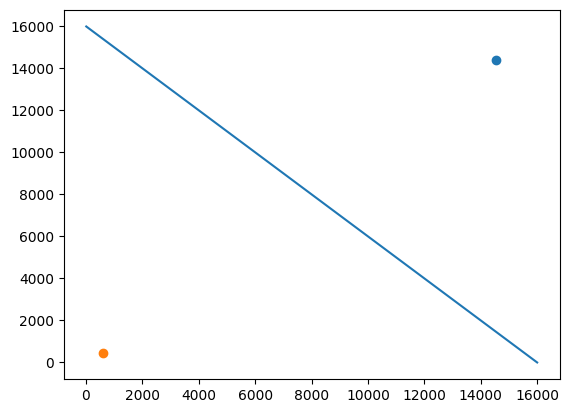

In [19]:
plt.plot(range(16000,0,-10),range(0,16000,10))
plt.scatter(json.loads(list_match_timeline_data_whereMid[0][1])['frames'][0]['participantFrames']['7']['position']['x'], json.loads(list_match_timeline_data_whereMid[0][1])['frames'][0]['participantFrames']['7']['position']['y'])
plt.scatter(json.loads(list_match_timeline_data_whereMid[0][1])['frames'][0]['participantFrames']['2']['position']['x'], json.loads(list_match_timeline_data_whereMid[0][1])['frames'][0]['participantFrames']['2']['position']['y'])

In [ ]:
#Info timeline
gold_diff_15_list = []
forward_percent =[]
for matchIndex, match in enumerate(list_match_timeline_data_whereMid):
    time_forward = []


    match_metadata = json.loads(match[0])
    for idx, player_puuid in enumerate(match_metadata['participants']):
        if player_puuid == mid_kr_puuid:
            index_qing = idx

    
    for idx, participant in enumerate(json.loads(list_match_end_data_whereMid[matchIndex][1])['participants']):
        if (participant['teamPosition'] == "MIDDLE") and (participant['puuid']) != mid_kr_puuid:
            index_ennemy = idx
            side_ennemy = participant['teamId']
            if side_ennemy == 100 : 
                side_qing = 200 
            else : 
                side_qing = 100
           

    match_info = json.loads(match[1])
    
    if len(match_info['frames']) > 16 :
        qing_gold_15 = match_info['frames'][15]['participantFrames'][str(index_qing+1)]['totalGold']
        ennemy_gold_15 = match_info['frames'][15]['participantFrames'][str(index_ennemy+1)]['totalGold']
        gold_diff_15_list.append(qing_gold_15 - ennemy_gold_15)

    for frame in match_info['frames'] :  
        x = frame['participantFrames'][str(index_qing+1)]['position']['x']
        y = frame['participantFrames'][str(index_qing+1)]['position']['y']

        time_forward.append(is_forward(x,y,side_qing))
    forward_percent.append(statistics.mean(time_forward))

    
        

# gold diff
# forward %

[0, 0.5925925925925926, 0.4, 0.23529411764705882, 0.125, 0.46875, 0.03225806451612903, 0.4166666666666667, 0.22580645161290322, 0.48717948717948717, 0.08, 0.6470588235294118, 0.47058823529411764, 0.5294117647058824, 0.46875, 0.3333333333333333, 0.5882352941176471, 0.5, 0.11764705882352941, 0.7741935483870968, 0.6538461538461539, 0.4444444444444444, 0.24, 0.3333333333333333, 0.5172413793103449, 0.17647058823529413, 0.5517241379310345, 0, 0.47368421052631576, 0, 0.37037037037037035, 0.2777777777777778, 0.15, 0.058823529411764705, 0.25, 0.41935483870967744, 0.5833333333333334, 0.7241379310344828, 0, 0.7419354838709677, 0.22857142857142856, 0.20833333333333334, 0.21739130434782608, 0.4117647058823529, 0.11764705882352941, 0.5, 0.4864864864864865, 0.2222222222222222, 0.7058823529411765, 0.07692307692307693, 0.8, 0, 0.11538461538461539, 0.2, 0.13636363636363635, 0.4230769230769231, 0.041666666666666664, 0.16129032258064516, 0.06451612903225806, 0.5, 0.46153846153846156, 0.3235294117647059, 0

In [33]:
#attention il a des games autofills
print(statistics.mean(kda_list))
print(statistics.mean(cs_min))
print(statistics.mean(gold_diff_15_list))
print(statistics.mean(forward_percent))

4.438730873087309
7.886367344876574
236.53493013972056
0.34231159283986196
